<style>
  .scrollable{
    max-height: 300px;
    max-width: 100%;
    overflow: auto;
  }
</style>

# **Experimenting with various regression models**
---

> There are several regression models (note that this list is not comprehensive of all regression models).  

> However, the following models will be touched in this notebook:

> + **Linear regression:** The simplest form of regression, with no limit to the number of features used. It comes in many forms, often named by the number of features used and the shape of the curve that fits. [`Lasso`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso), [`Ridge`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge), e.t.c are variations.

> + **Decision trees:** Take a step-by-step approach to predicting a variable. Decision Trees utilize a tree-based approach in which the features in the dataset are examined in a series of evaluations, each of which results in a branch in a decision tree based on the feature value. At the end of each series of branches are leaf-nodes with the predicted label value based on the feature values.  

> + **Ensemble algorithms:** Construct not just one decision tree, but a large number of trees, allowing better predictions on more complex data. Ensemble algorithms, such as `Random Forest`, are widely used in machine learning and data science due to their **strong** prediction abilities.

> + e.t.c

> For most real-world scenarios, the [`Scikit-Learn estimator cheat sheet`](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) and [`Microsoft's Machine Learning Algorithm Cheat Sheet`](https://learn.microsoft.com/en-us/azure/machine-learning/algorithm-cheat-sheet?view=azureml-api-1) are a good starting point



## Load the data

In [1]:
# import pandas
import pandas as pd
# matplotlib
import matplotlib.pyplot as plt
# specify stylesheet
plt.style.use("fast")

# Load the data
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv
bike_data = pd.read_csv('daily-bike-share.csv')


--2024-06-01 10:21:08--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48800 (48K) [text/plain]
Saving to: ‘daily-bike-share.csv’

daily-bike-share.cs 100%[===================>]  47.66K  --.-KB/s    in 0.008s  

2024-06-01 10:21:08 (5.59 MB/s) - ‘daily-bike-share.csv’ saved [48800/48800]



In [2]:
# Separate the features and label from the dataset
# features / imputs:
X = bike_data[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']]

# output / label:
y = bike_data["rentals"]

In [3]:
# Randomly split the labels and features into training and validation/test sets:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [4]:
# Define a function to plot Predicted Label vs Actual Label + line of best fit
def plot_visual(y_test, y_pred):
  from scipy.stats import linregress
  # Recall the formula for a trend line is y = f(x) = mx + b, hence:
  result = linregress(y_test, y_pred)
  m = result.slope
  b = result.intercept

  fig, ax = plt.subplots(figsize=(5.5, 4))

  # The scatter plot
  ax.scatter(x = y_test,
            y = y_pred,
            marker=".", color="#1b1b1b")

  # The line plot, x = y_test; y = mx+b
  ax.plot(y_test, (m*y_test)+b,
            color = "#ff004f",
            linewidth=1.5)

  # Customize the plot with matplotlib methods
  ax.set_ylabel("Predicted Label Values", weight="black", fontsize=9.5)
  ax.set_xlabel("Actual Label Values", weight="black", fontsize=9.5)
  ax.set_title("Daily Bike Share Predictions (with Regression Line)")

  plt.show()

In [5]:
# Define function to evaluate model performance
def evaluate_model(y_test, y_pred):
  from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
  import numpy as np

  # mse
  mse = mean_squared_error(y_test, y_pred)
  print(f"\nMSE: {round(mse, 2)}")

  # MAE
  mae = mean_absolute_error(y_test, y_pred)
  print(f"MAE: {round(mae, 2)}")

  # rmse
  rmse = np.sqrt(mse)
  print(f"RMSE: {round(rmse, 2)}")

  # Rsquared
  r2 = r2_score(y_test, y_pred)
  print(f"R Squared: {round(r2, 3)}")

## Another linear algorithm - [`Lasso`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso)

### Fit the model

In [6]:
# import Lasso
from sklearn.linear_model import Lasso

# Train the model
model = Lasso().fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

### Plot predicted vs actual values

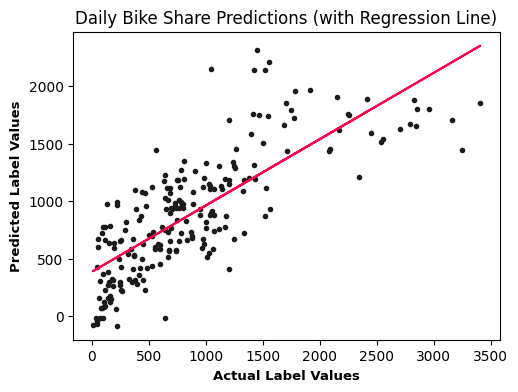

In [7]:
plot_visual(y_test, y_pred)

### Evaluate the model

In [8]:
evaluate_model(y_test, y_pred)


MSE: 201155.71
MAE: 320.6
RMSE: 448.5
R Squared: 0.606


## A [`DecisionTreeRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn-tree-decisiontreeregressor) Algorithm

### Fit the model

In [9]:
from sklearn.tree import DecisionTreeRegressor

# Train tree model
tree_model = DecisionTreeRegressor().fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

### Plot pedicted vs actual values

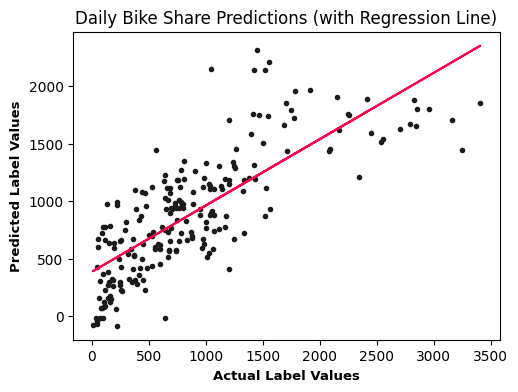

In [10]:
plot_visual(y_test, y_pred)

### Evaluate the model

In [11]:
evaluate_model(y_test, y_pred)


MSE: 201155.71
MAE: 320.6
RMSE: 448.5
R Squared: 0.606


## Ensemble Algorithms
> Ensemble algorithms work by combining multiple base estimators to produce an optimal model, either by **bagging** or **boosting.**  

> The basic idea is that a group of weak learners can come together to form one strong learner. More in-deth explanation lined [`here`](https://www.datacamp.com/tutorial/what-bagging-in-machine-learning-a-guide-with-examples)

### Bagging ensemble algorithm
> Bagging (bootstrap aggregating) is an ensemble method that involves training multiple models independently on random subsets of the data, and aggregating their predictions through voting or averaging.
+ Each model is trained independently in parallel on a random subset of the data sampled with replacement, meaning that the individual data points can be chosen more than once
+ The predictions from all the sampled models are then combined through a simple averaging to make the overall prediction
+ Bagging is particularly effective in reducing variance and overfitting

#### [`RandomForestRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn-ensemble-randomforestregressor) algorithm
+ RandomForest is a **bagging** model, which applies an averaging function to multiple Decision Tree models for a better overall model.

##### Fit the model

In [12]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
forest_model = RandomForestRegressor().fit(X_train, y_train)

# Predict
y_pred = forest_model.predict(X_test)

##### Plot predicted vs actual values

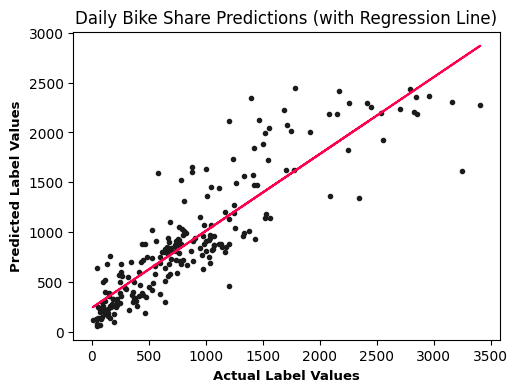

In [13]:
plot_visual(y_test, y_pred)

##### Evaluate the model

In [14]:
evaluate_model(y_test, y_pred)


MSE: 114024.36
MAE: 242.43
RMSE: 337.67
R Squared: 0.776


### Boosting ensemble algorithms
> In boosting, models are trained sequentially, with each model learning from the errors of the previous one.  
+ Entails building a sequence of models that build on one another to improve predictive performance

#### [`GradientBoostingRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn-ensemble-gradientboostingregressor) algorithm  
+ GradientBoosting is a **boosting** algorithm, which like a RandomForest algorithm builds multiple trees; but instead of building them all independently and taking the average result, each tree is built on the outputs of the previous one in an attempt to incrementally reduce the loss (error) in the model.

##### Fit the model

In [15]:
from sklearn.ensemble import GradientBoostingRegressor

# Train the model
gb_model = GradientBoostingRegressor().fit(X_train, y_train)

# Predict
y_pred = gb_model.predict(X_test)

##### Plot predicted vs actual values

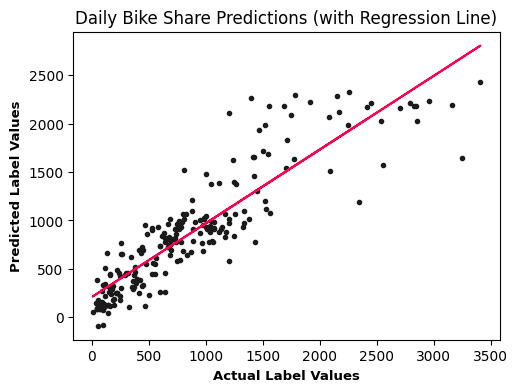

In [16]:
plot_visual(y_test, y_pred)

##### Evaluate the model

In [17]:
evaluate_model(y_test, y_pred)


MSE: 103565.82
MAE: 227.98
RMSE: 321.82
R Squared: 0.797


#### [`XGBRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn-ensemble-gradientboostingregressor) algorithm
> [`xgboost`](https://xgboost.readthedocs.io/en/stable/index.html) is a machine learning algorithm that belongs to the ensemble learning category, specifically **gradient boosting** framework  
> `xgboost` utilizes decision trees as base learners and employs regularization techniques to enhance model generalization.     
+ [`XGBRegressor`](https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBRegressor) is an implementation of the scikit-learn API for XGBoost regression

##### Fit the model

In [18]:
from xgboost import XGBRegressor

# Fit the model
xgb = XGBRegressor(objective="reg:squarederror").fit(X_train, y_train)

# Predict
y_pred = xgb.predict(X_test)

##### Plot predictev vs actual values

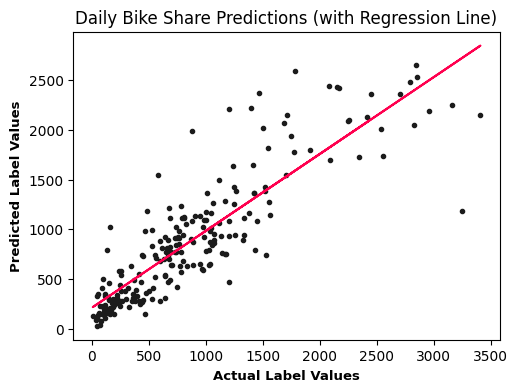

In [19]:
plot_visual(y_test, y_pred)

##### Evaluate the model

In [20]:
evaluate_model(y_test, y_pred)


MSE: 125044.66
MAE: 244.26
RMSE: 353.62
R Squared: 0.755
